In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("./data/medical_costs.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#split catergorical data
#first sex - split into 1
dataEncoded = pd.get_dummies(data,columns = ['sex'], drop_first=True)

#then smoker - split into 1
dataEncoded = pd.get_dummies(dataEncoded,columns = ['smoker'], drop_first=True)

#then region - split into 3
dataEncoded = pd.get_dummies(dataEncoded,columns = ['region'], drop_first=True)

In [7]:
dataEncoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [8]:
dataEncoded.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [9]:
#standardisation
scalar = MinMaxScaler()
dataScaled = dataEncoded.copy()
dataScaled[['age', 'bmi', 'children', 'charges']] = \
scalar.fit_transform(dataEncoded[['age', 'bmi', 'children', 'charges']])



In [10]:
import statsmodels.api as sm

dataCleaned = sm.add_constant(dataScaled)



c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
results = sm.OLS(dataCleaned["charges"], dataCleaned.drop(["charges","sex_male", "region_northwest","region_southwest","region_southeast"] ,axis = 1)).fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:17:37   Log-Likelihood:                 1227.6
No. Observations:                1338   AIC:                            -2445.
Df Residuals:                    1333   BIC:                            -2419.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0550      0.008     -6.796      0.0

Text(0, 0.5, 'Charges')

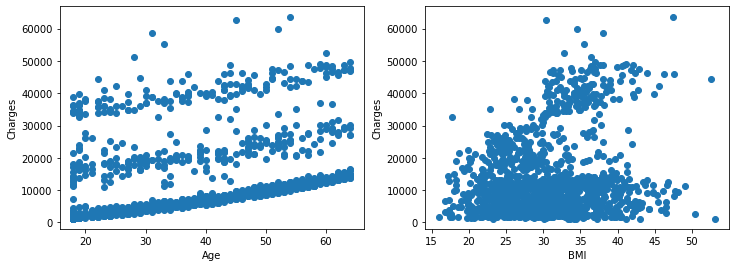

In [13]:
#plot the graphs
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.scatter(data["age"], data["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.scatter(data["bmi"], data["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")


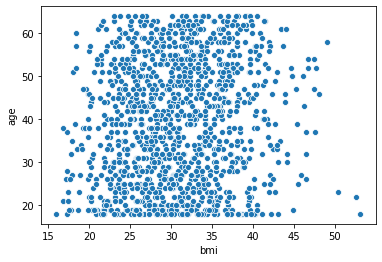

In [14]:
#data.groupby(['sex','bmi'])['charges'].describe()
sns.scatterplot(data['bmi'], data['age']) #gives scatterplot with labels on the axis'

Text(0, 0.5, 'Charges')

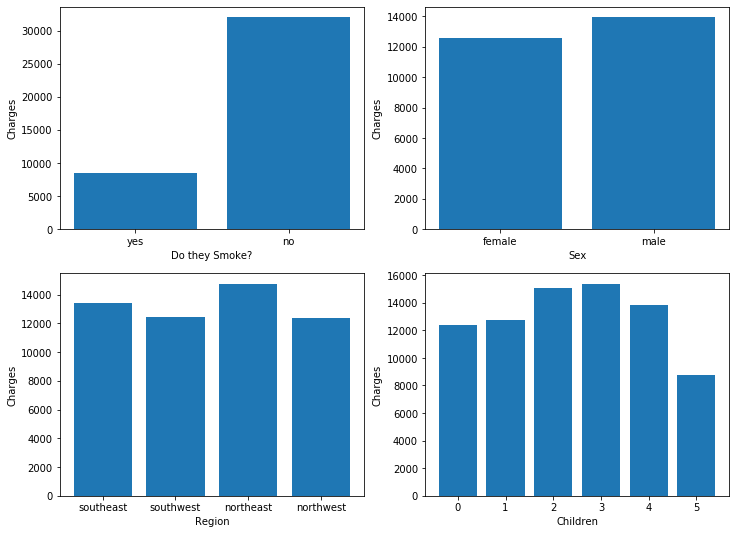

In [15]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.bar(list(set(data['smoker'])),data.groupby('smoker')["charges"].mean())
plt.xlabel("Do they Smoke?")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.bar(list(set(data['sex'])),data.groupby('sex')["charges"].mean())
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.subplot(2,2,3)
plt.bar(list(set(data['region'])),data.groupby('region')["charges"].mean())
plt.xlabel("Region")
plt.ylabel("Charges")

plt.subplot(2,2,4)
plt.bar(list(set(data['children'])),data.groupby('children')["charges"].mean())
plt.xlabel("Children")
plt.ylabel("Charges")

In [16]:
from sklearn.model_selection import train_test_split
#x = dataScaled['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       #'region_northwest', 'region_southeast', 'region_southwest']

x = dataScaled[["age","bmi","smoker_yes","children",'region_northwest', 'region_southeast', 'region_southwest']]
y = dataScaled["charges"]

#split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)
#lr.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.score(x_test,y_test)

0.7959029603133169

In [19]:
lr.coef_

array([ 0.18367127,  0.1977664 ,  0.37762595,  0.03530111, -0.00308756,
       -0.01723504, -0.01386734])

In [20]:
lr.intercept_

-0.04522230399754151

In [21]:
y_test

578     0.137316
610     0.118531
569     0.711591
1034    0.188802
198     0.136035
          ...   
574     0.193176
1174    0.052867
1327    0.131783
817     0.039518
1337    0.447249
Name: charges, Length: 335, dtype: float64

Text(0, 0.5, 'Charges')

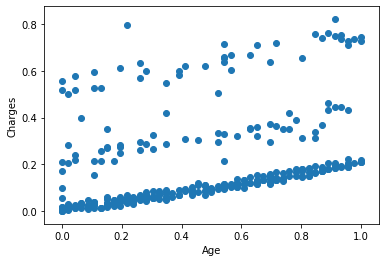

In [22]:
plt.scatter(x_test["age"],y_test)
#plt.plot(x_test["age"], lr.predict(x_test), c='red')
plt.xlabel('Age')
plt.ylabel('Charges')

In [39]:
#only for SLR
#plt.scatter(x_test,y_test)
#plt.plot(x_test, lr.predict(x_test.values.reshape(-1,1)), c='red')
#plt.xlabel('Age')
#plt.ylabel('Charges')

In [ ]:
lr.score(x_test,y_test)
#lr.score(X_test.values.reshape(-1,1),y_test)

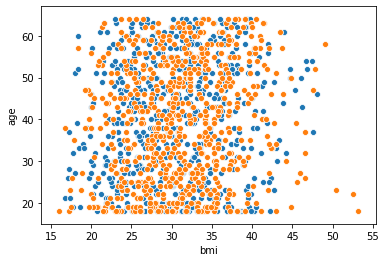

In [26]:
females = data.loc[data['sex'] == 'female']
males = data.loc[data['sex'] == 'male']

sns.scatterplot(females['bmi'], females['age'])

sns.scatterplot(males['bmi'], males['age'])

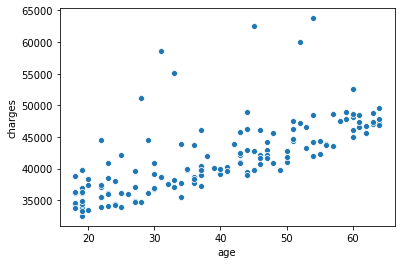

In [66]:
SmokerHighBMI = data.loc[(data['smoker'] == 'yes') & (data['bmi']> 30)]
NonSmokerHighBMI = data.loc[(data['smoker'] == 'no') & (data['bmi']> 30)]

#SmokerHighBMI = data.loc[(data['smoker'] == 'yes') & (data['bmi']< 30) & (data['charges']>10000)]
#NonSmokerHighBMI = data.loc[(data['smoker'] == 'no') & (data['bmi']< 30) & (data['charges']>10000)]

NonSmoker = data.loc[data['smoker'] == 'no' ]

#data = data.loc[(data["R&D Spend"] != 0) & (data["Marketing Spend"] != 0)]

sns.scatterplot(SmokerHighBMI['age'], SmokerHighBMI['charges'])
#sns.scatterplot(NonSmokerHighBMI['age'], NonSmokerHighBMI['charges'])

In [50]:
Smoker = data.loc[data['smoker'] == 'yes']
NonSmoker = data.loc[data['smoker'] == 'no']
sns.scatterplot(Smoker['age'], Smoker['charges'], legend='brief')
#sns.scatterplot(NonSmoker['age'], NonSmoker['charges'])

ValueError: Shape of passed values is (2, 6), indices imply (274, 6)